# Creating Custom Data sets


## 0. Importing Pytorch and setting up device-agnostic code 

In [2]:
import torch
from torch import nn

torch.__version__

'2.1.2'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else: 
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and suhsi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, suhsi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data\pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


In [5]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
     

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [8]:
image_path


WindowsPath('data/pizza_steak_sushi')

Random image path: data\pizza_steak_sushi\train\steak\1736968.jpg
Image class: steak
Image height: 512
Image width: 512


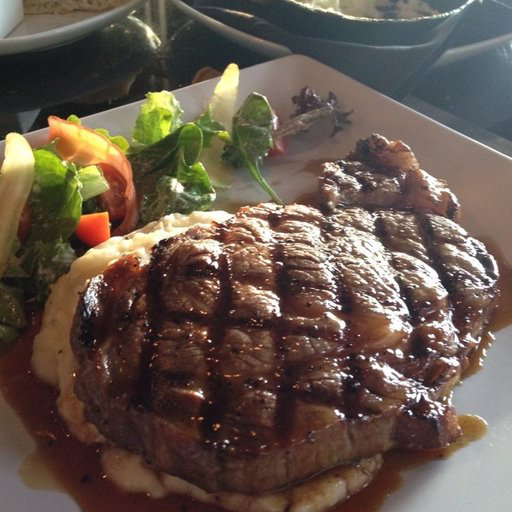

In [9]:
import random 
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata 
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img
     

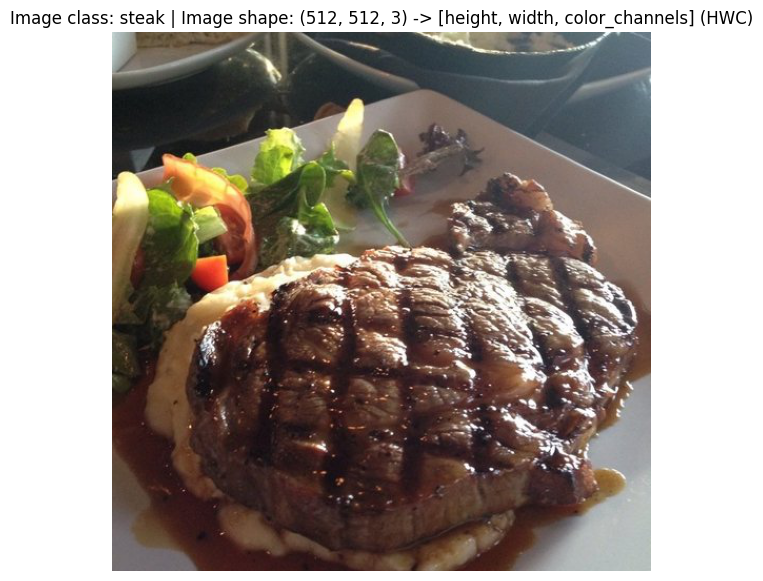

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);
     

In [11]:
img_as_array

array([[[200, 216, 213],
        [192, 208, 207],
        [186, 202, 201],
        ...,
        [106, 124, 136],
        [105, 123, 135],
        [103, 121, 133]],

       [[197, 213, 210],
        [192, 208, 207],
        [186, 202, 201],
        ...,
        [106, 124, 136],
        [103, 121, 133],
        [100, 118, 130]],

       [[197, 213, 210],
        [195, 211, 208],
        [189, 205, 204],
        ...,
        [102, 120, 132],
        [107, 125, 137],
        [110, 128, 140]],

       ...,

       [[117, 111, 113],
        [115, 109, 111],
        [115, 109, 111],
        ...,
        [182, 191, 188],
        [182, 191, 188],
        [182, 191, 188]],

       [[116, 110, 112],
        [115, 109, 111],
        [116, 110, 112],
        ...,
        [180, 189, 186],
        [180, 189, 186],
        [181, 190, 187]],

       [[115, 109, 111],
        [115, 109, 111],
        [117, 111, 113],
        ...,
        [185, 194, 191],
        [186, 195, 192],
        [187, 196, 193]]

In [12]:
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
# write a transform for image

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [18]:
data_transform(img)

tensor([[[0.4235, 0.4157, 0.3922,  ..., 0.5176, 0.6353, 0.7098],
         [0.3961, 0.3804, 0.3686,  ..., 0.5176, 0.6196, 0.6941],
         [0.3804, 0.3725, 0.3686,  ..., 0.4941, 0.5843, 0.6627],
         ...,
         [0.7176, 0.7176, 0.7176,  ..., 0.4471, 0.4510, 0.4510],
         [0.7176, 0.7176, 0.7176,  ..., 0.4510, 0.4549, 0.4549],
         [0.7176, 0.7176, 0.7176,  ..., 0.4510, 0.4549, 0.4549]],

        [[0.4941, 0.4902, 0.4667,  ..., 0.5059, 0.6706, 0.7647],
         [0.4667, 0.4510, 0.4471,  ..., 0.5020, 0.6431, 0.7529],
         [0.4510, 0.4431, 0.4392,  ..., 0.4706, 0.6000, 0.7176],
         ...,
         [0.7529, 0.7529, 0.7529,  ..., 0.4235, 0.4275, 0.4275],
         [0.7529, 0.7529, 0.7529,  ..., 0.4275, 0.4314, 0.4314],
         [0.7529, 0.7529, 0.7529,  ..., 0.4275, 0.4314, 0.4314]],

        [[0.5412, 0.5373, 0.5098,  ..., 0.4588, 0.6549, 0.7608],
         [0.5137, 0.4980, 0.4902,  ..., 0.4431, 0.6196, 0.7373],
         [0.5059, 0.4980, 0.4902,  ..., 0.4157, 0.5725, 0.

In [19]:
import random

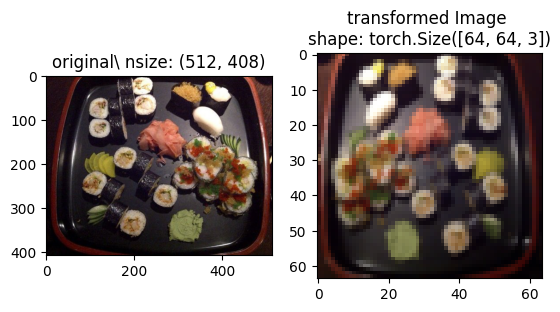

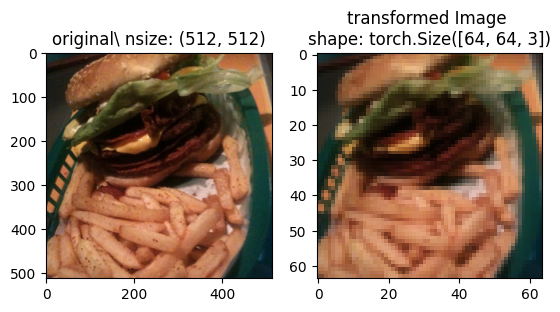

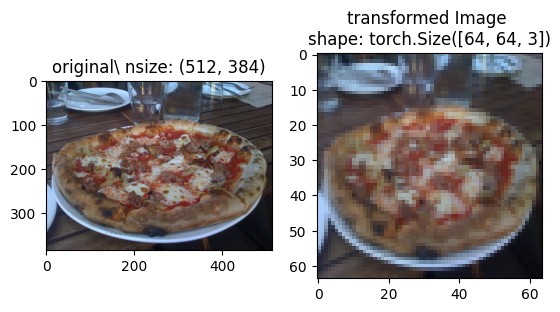

In [23]:
def plot_transformed_images(image_paths,transform,n=3):
    """  
    selects n random images from path fo the images and loads/ transforms them then plots the originals vs the transformed version.
    """
    random.seed(42)

    random_image_paths = random.sample(image_paths,k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\ nsize: {f.size}")


        transformed_image = transform(f).permute(1,2,0)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"transformed Image \nshape: {transformed_image.shape}")


plot_transformed_images(image_paths=image_path_list,n=3,transform=data_transform)
    

## Option 1: Load data using ImageFolder

In [24]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,target_transform=None)

test_data =datasets.ImageFolder(root=test_dir,transform=data_transform)

In [25]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

## Option 2: using base class

In [26]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
